### Лабораторная работа №2: **Выделение именованных сущностей с использованием библиотеки spaCy**

#### Теоретическая часть

**Выделение именованных сущностей (NER)** – это процесс идентификации и классификации именованных сущностей в тексте, таких как имена людей, организации, места, даты и т.д. Библиотека `spaCy` предоставляет мощные инструменты для выполнения этой задачи.

#### Практическая задача

Используя корпус данных новостей, выполните следующую последовательность шагов:

1. Установите и импортируйте библиотеку `spaCy`.
2. Загрузите предварительно обученную модель английского языка (`en_core_web_sm`).
3. Предобработайте текст: удалите лишние символы, проведите токенизацию.
4. Выполните NER на каждом документе.
5. Сохраните результаты в формате JSON или CSV.
6. Проанализируйте полученные данные и найдите наиболее часто встречающиеся сущности.

#### Указания по выполнению

1. Используйте функцию `nlp.pipe()` для пакетной обработки документов.
2. Экспериментируйте с различными моделями `spaCy`, чтобы найти лучшую производительность.
3. Постройте график распределения частот именованных сущностей.
4. Подготовьте отчет, включающий код, примеры выделенных сущностей и анализ полученных результатов.

In [1]:
import re
from sklearn.datasets import fetch_20newsgroups
from tqdm import tqdm
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Установите и импортируйте библиотеку `spaCy`.

In [2]:
import spacy

### 2. Загрузите предварительно обученную модель английского языка (`en_core_web_sm`).

In [3]:
nlp = spacy.load("en_core_web_sm")

### 3. Предобработайте текст: удалите лишние символы, проведите токенизацию.


In [4]:
docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes')).data

def preprocess_text(text):
    text = re.sub(r'\d+|\s+', ' ', text).strip()
    return text.strip()

docs_clean = [preprocess_text(doc) for doc in docs]

len(docs_clean), docs_clean[0]

(18846,
 "I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his regular season stats. He is also a lot fo fun to watch in the playoffs. Bowman should let JAgr have a lot of fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final regular season game. PENS RULE!!!")

### 4. Выполните NER на каждом документе.


In [5]:
ner_results = []
for i, spacy_doc in enumerate(tqdm(nlp.pipe(docs_clean, batch_size=4), total=len(docs_clean))):
    entities = [(ent.text, ent.label_) for ent in spacy_doc.ents]
    ner_results.append({'doc_id': i, 'entities': entities})

ner_results[0]

100%|██████████| 18846/18846 [06:32<00:00, 48.00it/s] 


{'doc_id': 0,
 'entities': [('Pens', 'ORG'),
  ("non-PIttsburghers'", 'ORG'),
  ('Devils', 'GPE'),
  ('Bowman', 'PERSON'),
  ('Pens', 'PERSON'),
  ('Jersey', 'GPE'),
  ('Islanders', 'NORP')]}

### 5. Сохраните результаты в формате JSON или CSV.


In [6]:
df_ner = pd.DataFrame(ner_results)
df_ner.to_csv('data/ner_results.csv', index=False)
pd.read_csv('data/ner_results.csv')

,doc_id,entities
0,0,"[('Pens', 'ORG'), (""non-PIttsburghers'"", 'ORG'..."
1,1,"[('VESA', 'ORG')]"
2,2,"[('Mediterranean', 'LOC'), ('some years', 'DAT..."
3,3,"[('SCSI', 'ORG'), ('DMA', 'ORG'), ('SCSI', 'OR..."
4,4,"[('Jasmine', 'PERSON')]"
...,...,...
18841,18841,"[('David Nye', 'PERSON'), ('CT', 'ORG'), ('ER'..."
18842,18842,[]
18843,18843,"[('CPU', 'ORG'), ('CPU', 'ORG'), ('CPU', 'ORG'..."
18844,18844,"[('steve', 'PERSON')]"


### 6. Проанализируйте полученные данные и найдите наиболее часто встречающиеся сущности.


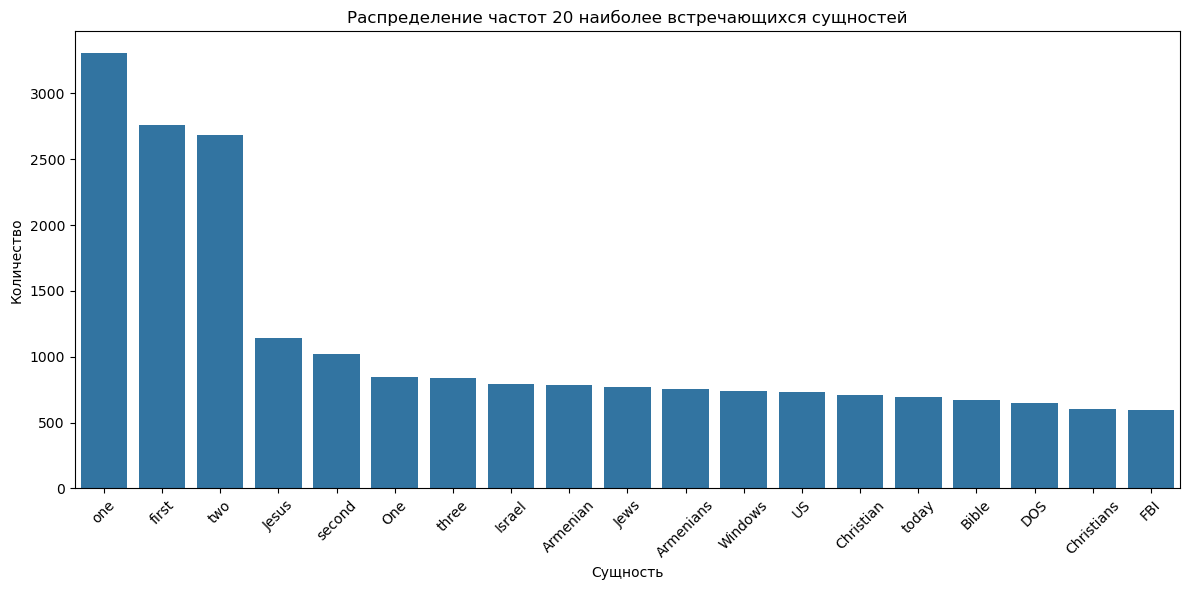

In [ ]:
all_entities = []
for result in ner_results:
    all_entities.extend([ent[0] for ent in result['entities']])

counter = Counter(all_entities)
most_common = counter.most_common(20)

df_entities = pd.DataFrame(most_common, columns=['entity', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(data=df_entities, x='entity', y='count')
plt.xticks(rotation=45)
plt.title('Распределение частот 20 наиболее встречающихся сущностей')
plt.xlabel('Сущность')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

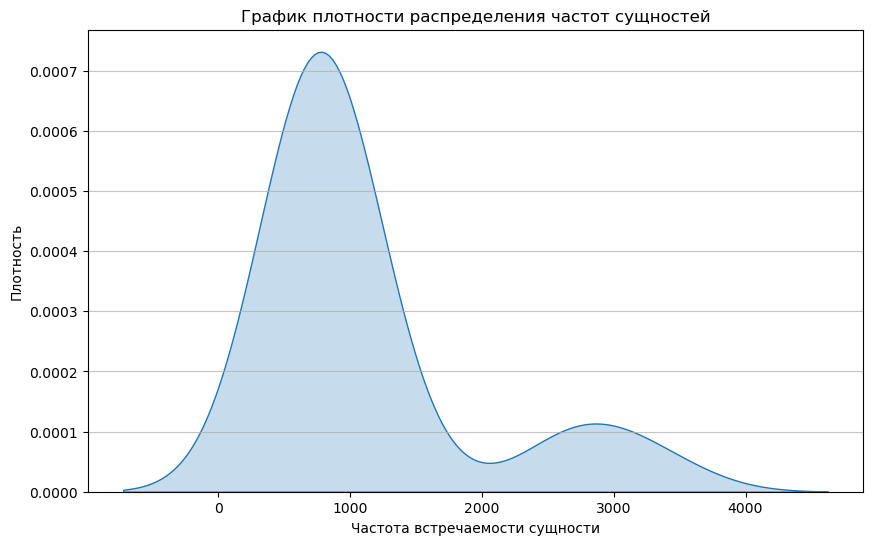

In [8]:
frequencies = df_entities['count'].values

plt.figure(figsize=(10, 6))
sns.kdeplot(frequencies, fill=True) 

plt.title('График плотности распределения частот сущностей')
plt.xlabel('Частота встречаемости сущности')
plt.ylabel('Плотность')

plt.grid(axis='y', alpha=0.75)
plt.show()